In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Family
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import Bunch
import skimage as sk

In [2]:
def load_image_file(Location ,dim=(64,64)):  
    """ * 64 is Height of image and 
        * 64 width of a image
    """
    image_dir = Path(Location)
    folders = [directory for directory  in image_dir.iterdir() if directory.is_dir()]
    categories  = [fo.name for fo in folders]
    
    
    images = []
    flat_data =[]
    target = []
    
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = sk.io.imread(file)
            #print("Before Transformation ")
            plt.imshow(img)
            plt.show()
            
            img_resized = resize(img, dim, anti_aliasing=True, mode='reflect')
            #print("After Transformation")
            plt.imshow(img_resized)
            #plt.show()
            
            # List Method append I am using Hear
            
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
            
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    
    return Bunch(data = flat_data,
                target = target,
                target_names = categories,
                images = images)

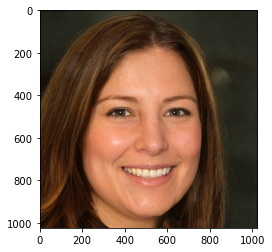

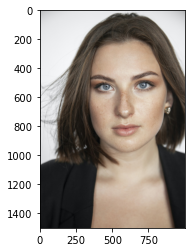

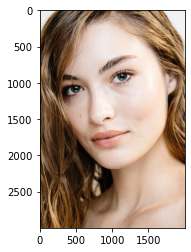

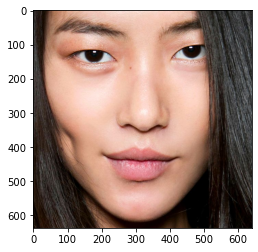

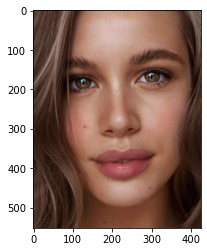

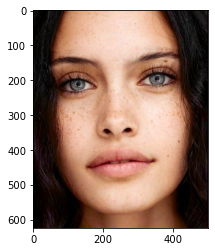

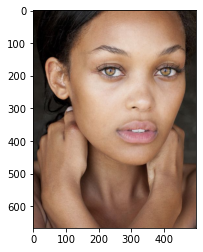

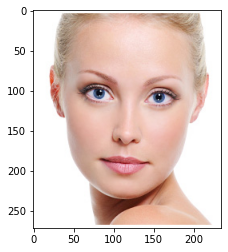

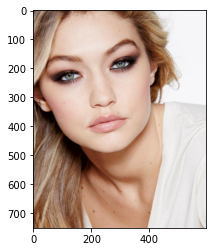

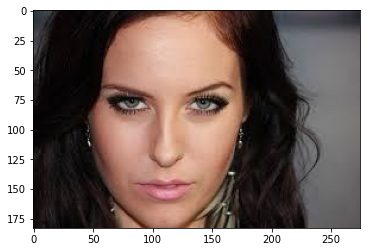

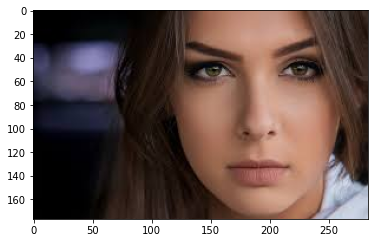

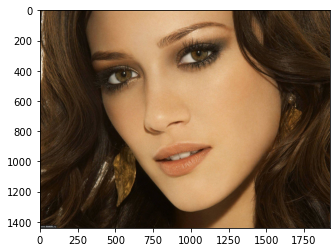

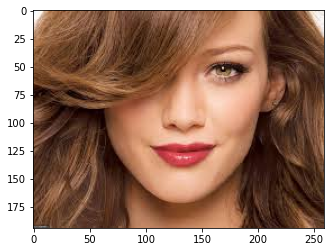

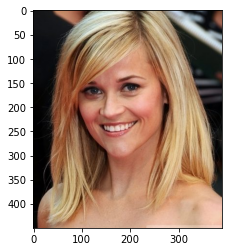

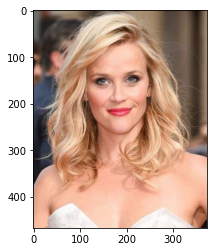

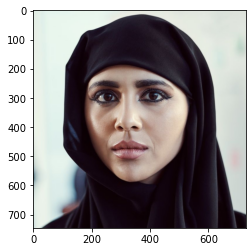

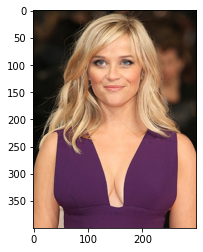

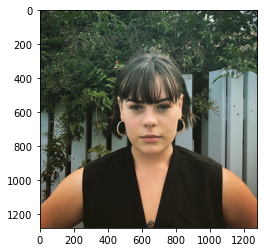

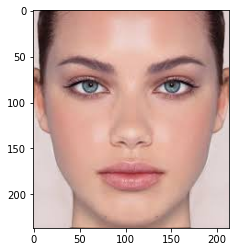

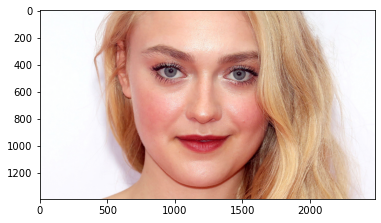

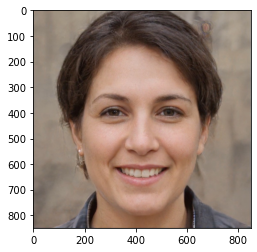

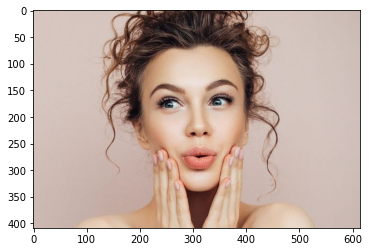

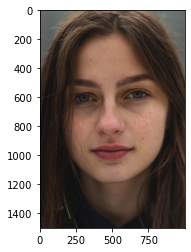

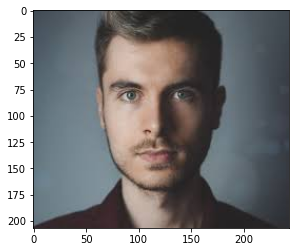

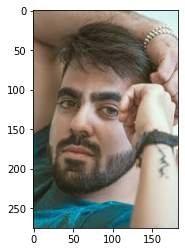

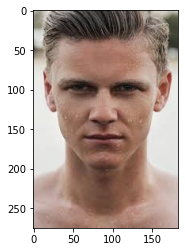

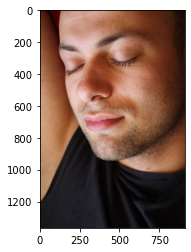

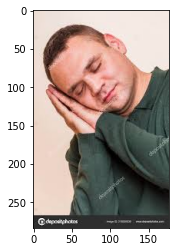

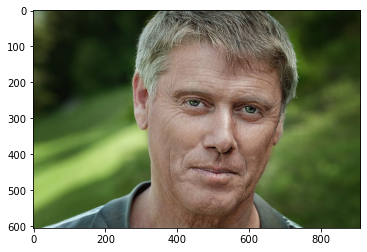

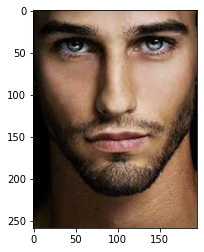

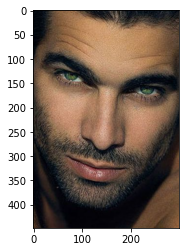

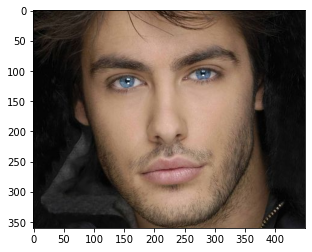

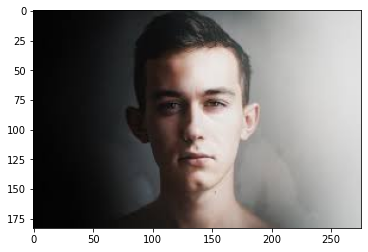

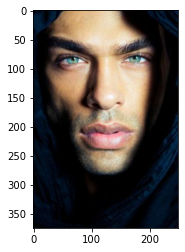

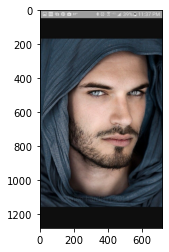

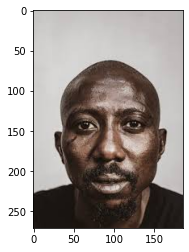

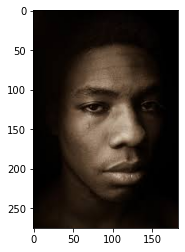

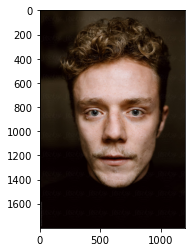

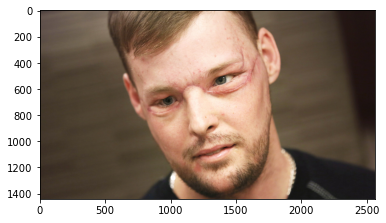

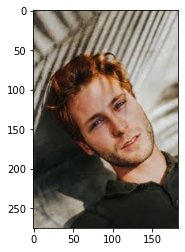

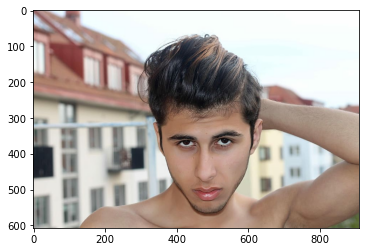

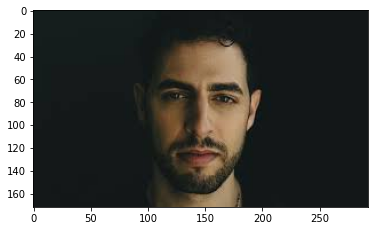

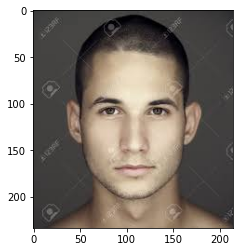

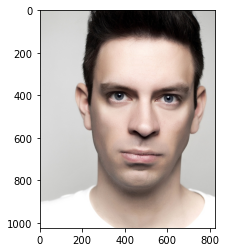

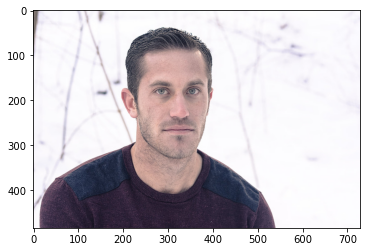

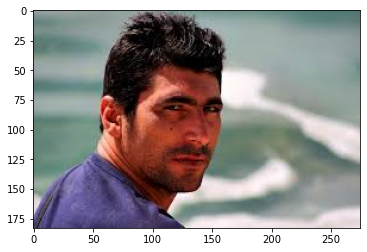

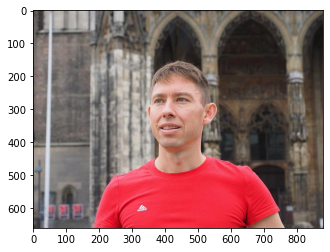

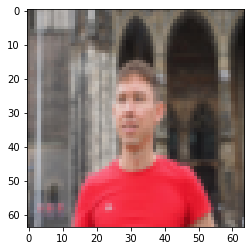

In [5]:
import skimage
image_dataset = load_image_file("Downloads/Humanbeing_face")

In [6]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images'])

In [7]:
image_dataset.data

array([[0.12647059, 0.1254902 , 0.09411765, ..., 0.14509804, 0.14901961,
        0.11372549],
       [0.75083487, 0.75475643, 0.76259957, ..., 0.06666667, 0.07058824,
        0.07843137],
       [0.93333333, 0.93333333, 0.93333333, ..., 0.85882353, 0.73333333,
        0.63921569],
       ...,
       [0.53627451, 0.49727137, 0.49779412, ..., 0.98431373, 0.98431373,
        0.99215686],
       [0.57282475, 0.61066176, 0.61988358, ..., 0.91427696, 0.86859681,
        0.90251225],
       [0.342019  , 0.32452512, 0.31372549, ..., 0.47867647, 0.48651961,
        0.51165748]])

In [8]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

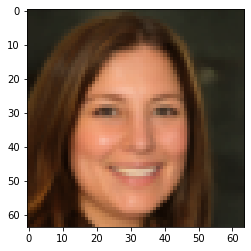

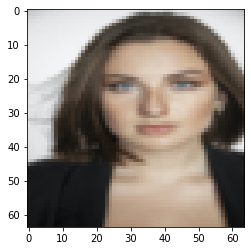

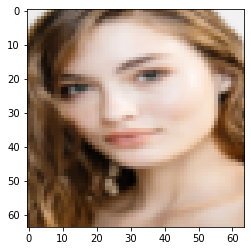

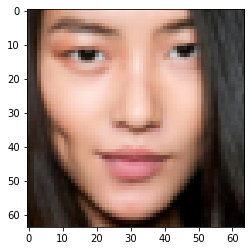

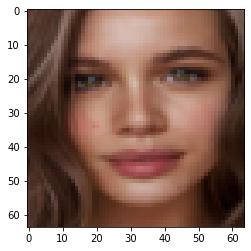

In [9]:
for I in range(5):
    plt.imshow(image_dataset.images[I])
    plt.show()

In [11]:
image_dataset.target_namest

AttributeError: target_namest

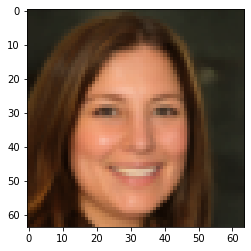

In [12]:
plt.imshow(image_dataset.images[0])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(image_dataset.data,image_dataset.target,random_state=1)
x_train.shape

(35, 12288)

In [15]:
x_test.shape

(12, 12288)

In [16]:
x_train.shape[0] != y_test.shape[0]

True

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
LR = LogisticRegression(max_iter=500,solver="newton-cg",C=0.001)
LR

LogisticRegression(C=0.001, max_iter=500, solver='newton-cg')

In [19]:
LR.fit(x_train,y_train)

LogisticRegression(C=0.001, max_iter=500, solver='newton-cg')

In [20]:
Train_Score = LR.score(x_train,y_train)
Train_Score

0.8

In [21]:
Test_score = LR.score(x_test,y_test)
Test_score

0.4166666666666667

In [22]:
yhat = LR.predict(x_test)
yhat

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [23]:
pd.DataFrame({"Actual Data":y_test,
             "New_predication":yhat})

Actual Data  New_predication
0             1                0
1             0                1
2             1                0
3             1                1
4             0                0
5             0                1
6             1                0
7             1                0
8             1                0
9             1                1
10            0                0
11            1                1

In [24]:
log_loss = LR.predict_proba(x_train)
log_loss

array([[0.47774811, 0.52225189],
       [0.3677991 , 0.6322009 ],
       [0.39565089, 0.60434911],
       [0.38564738, 0.61435262],
       [0.36031795, 0.63968205],
       [0.63912895, 0.36087105],
       [0.70253369, 0.29746631],
       [0.51916421, 0.48083579],
       [0.5498392 , 0.4501608 ],
       [0.53067792, 0.46932208],
       [0.58924238, 0.41075762],
       [0.48327169, 0.51672831],
       [0.72366381, 0.27633619],
       [0.57130269, 0.42869731],
       [0.39249477, 0.60750523],
       [0.41883803, 0.58116197],
       [0.51049612, 0.48950388],
       [0.55276864, 0.44723136],
       [0.60051338, 0.39948662],
       [0.70264076, 0.29735924],
       [0.50806019, 0.49193981],
       [0.60049227, 0.39950773],
       [0.67120185, 0.32879815],
       [0.54449052, 0.45550948],
       [0.56993359, 0.43006641],
       [0.58922134, 0.41077866],
       [0.54180454, 0.45819546],
       [0.49696962, 0.50303038],
       [0.63684016, 0.36315984],
       [0.56262246, 0.43737754],
       [0.

In [25]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [26]:
cm = confusion_matrix(y_test,yhat)
cm

array([[2, 2],
       [5, 3]], dtype=int64)

In [27]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.60      0.38      0.46         8

    accuracy                           0.42        12
   macro avg       0.44      0.44      0.41        12
weighted avg       0.50      0.42      0.43        12



In [28]:
accuracy_score(y_test,yhat)

0.4166666666666667

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
Knn = KNeighborsClassifier(n_neighbors=10)

In [31]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
Train_score = Knn.score(x_train,y_train)
Train_Score

0.8

In [33]:
Test_score = Knn.score(x_test,y_test)
Test_score

0.4166666666666667

In [34]:
Knn.classes_

array([0, 1])

In [35]:
Knn.predict_proba(x_train)

array([[0.5, 0.5],
       [0.3, 0.7],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.2, 0.8]])